In [11]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.4/124.9 MB 2.9 MB/s eta 0:00:44
   ---------------------------------------- 0.6/124.9 MB 3.9 MB/s eta 0:00:33
   ---------------------------------------- 1.0/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 1.6/124.9 MB 7.2 MB/s eta 0:00:18
    --------------------------------------- 2.7/124.9 MB 9.4 MB/s eta 0:00:13
   - -------------------------------------- 3.4/124.9 MB 10.8 MB/s eta 0:00:12
   - -------------------------------------- 4.6/124.9 MB 12.7 MB/s eta 0:00:10
   - -------------------------------------- 5.9/124.9 MB 13.9 MB/s eta 0:00:09
   -- ------------------------------------- 7.2/124.9 MB 15.3 MB/s eta 0:00:08
   -- ------------------------------------- 7.9/124.9 MB 15.3 MB/s eta 0

In [43]:
import pandas as pd

In [45]:
NBA_team=pd.read_excel("/Users/daphne/Documents/ NBA Data Sets/modelling_NBA_team.xlsx")

In [9]:
NBA_team.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'GAME_ID', 'SEASON', 'GAME_DATE_EST',
       'OPP_TEAM_ID_x', 'avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct',
       'avg_ast', 'avg_reb', 'avg_stl', 'avg_to', 'avg_pf', 'avg_fga',
       'avg_efg_pct', 'avg_fgm', 'win_streak', 'home_avg_pts', 'away_avg_pts',
       'home_win_pct', 'away_win_pct', 'home_head_to_head_avg_pts',
       'home_head_to_head_win_pct', 'OPP_TEAM_ID_y',
       'away_head_to_head_avg_pts', 'away_head_to_head_win_pct', 'opp_avg_pts',
       'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct', 'opp_avg_ast',
       'opp_avg_reb', 'opp_avg_stl', 'opp_avg_to', 'opp_avg_pf', 'opp_avg_fga',
       'opp_avg_efg_pct', 'opp_avg_fgm', 'opp_win_streak', 'opp_home_avg_pts',
       'opp_away_avg_pts', 'opp_home_win_pct', 'opp_away_win_pct', 'TEAM_WINS',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y'],
      dtype='object')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [08:58:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [08:58:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [08:58:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [08:58:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best Model Accuracy: 0.64
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      4744
           1       0.64      0.64      0.64      4806

    accuracy                           0.64      9550
   macro avg       0.64      0.64      0.64      9550
weighted avg       0.64      0.64      0.64      9550

Best Model Confusion Matrix:
[[2990 1754]
 [1707 3099]]
Precision: 0.64
Recall: 0.64
F1-Score: 0.64
Best Hyperparameters found by GridSearchCV:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
AUC Score: 0.69


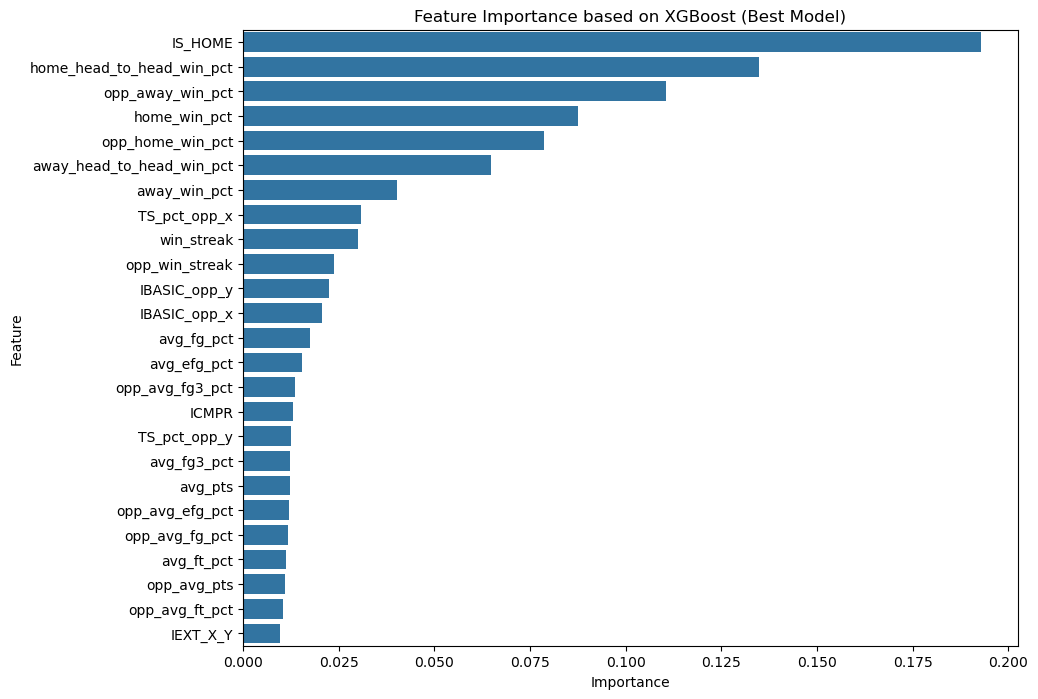

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select essential features for the model
X = NBA_team[['avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct',
       'avg_efg_pct', 'win_streak',
       'home_win_pct', 'away_win_pct',
       'home_head_to_head_win_pct',
       'away_head_to_head_win_pct', 'opp_avg_pts',
       'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct',
       'opp_avg_efg_pct', 'opp_win_streak', 'opp_home_win_pct', 'opp_away_win_pct',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y']]

# Define the target variable
y = NBA_team['TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")

# Print Classification Report, which includes precision, recall, F1-score
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate and print the confusion matrix
print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Calculate individual precision, recall, and F1-score for the positive class (1)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba_best)
print(f"AUC Score: {auc_score:.2f}")

# Plot feature importance of the best model
importance = best_model.feature_importances_
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on XGBoost (Best Model)')
plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Number of positive: 15255, number of negative: 15305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3804
[LightGBM] [Info] Number of data points in the train set: 30560, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499182 -> initscore=-0.003272
[LightGBM] [Info] Start training from score -0.003272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

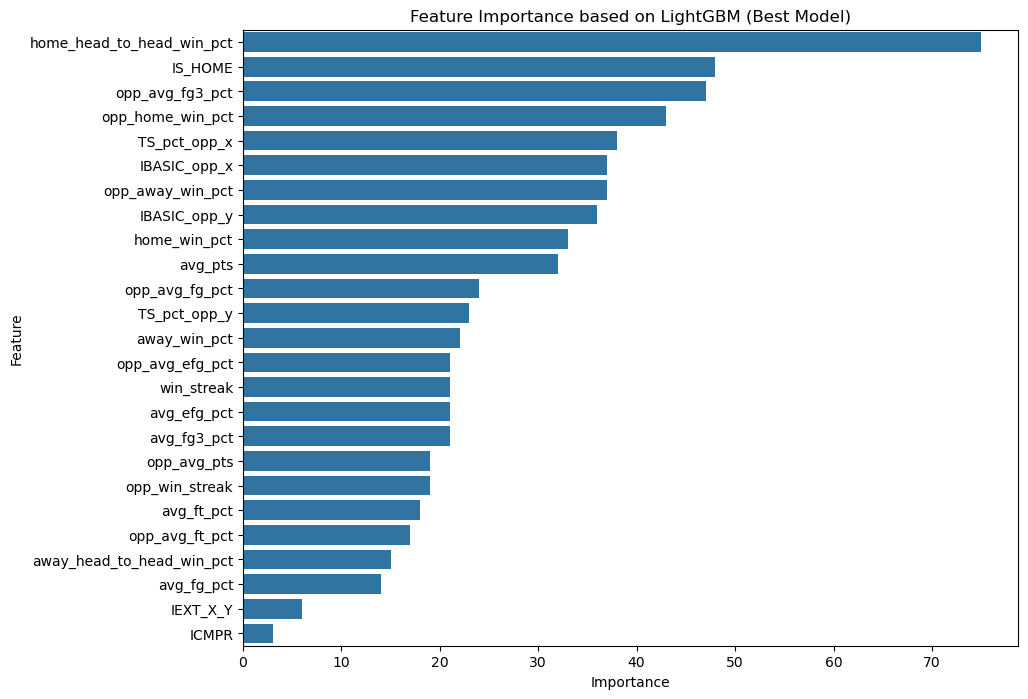

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select essential features for the model
X = NBA_team[['avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct',
       'avg_efg_pct', 'win_streak',
       'home_win_pct', 'away_win_pct',
       'home_head_to_head_win_pct',
       'away_head_to_head_win_pct', 'opp_avg_pts',
       'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct',
       'opp_avg_efg_pct', 'opp_win_streak', 'opp_home_win_pct', 'opp_away_win_pct',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y']]

# Define the target variable
y = NBA_team['TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100]
}

# Initialize the LightGBM model
model = lgb.LGBMClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")

# Print Classification Report, which includes precision, recall, F1-score
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate individual precision, recall, and F1-score for the positive class (1)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calculate the confusion matrix
print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_best)
print(f"AUC Score: {auc_score:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Plot feature importance of the best model
importance = best_model.feature_importances_
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on LightGBM (Best Model)')
plt.show()


In [21]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/26.1 MB 15.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Model Accuracy: 0.64
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      4744
           1       0.64      0.64      0.64      4806

    accuracy                           0.64      9550
   macro avg       0.64      0.64      0.64      9550
weighted avg       0.64      0.64      0.64      9550

Precision: 0.64
Recall: 0.64
F1-Score: 0.64
Best Model Confusion Matrix:
[[3018 1726]
 [1717 3089]]
AUC Score: 0.69
Best Hyperparameters found by GridSearchCV:
{'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


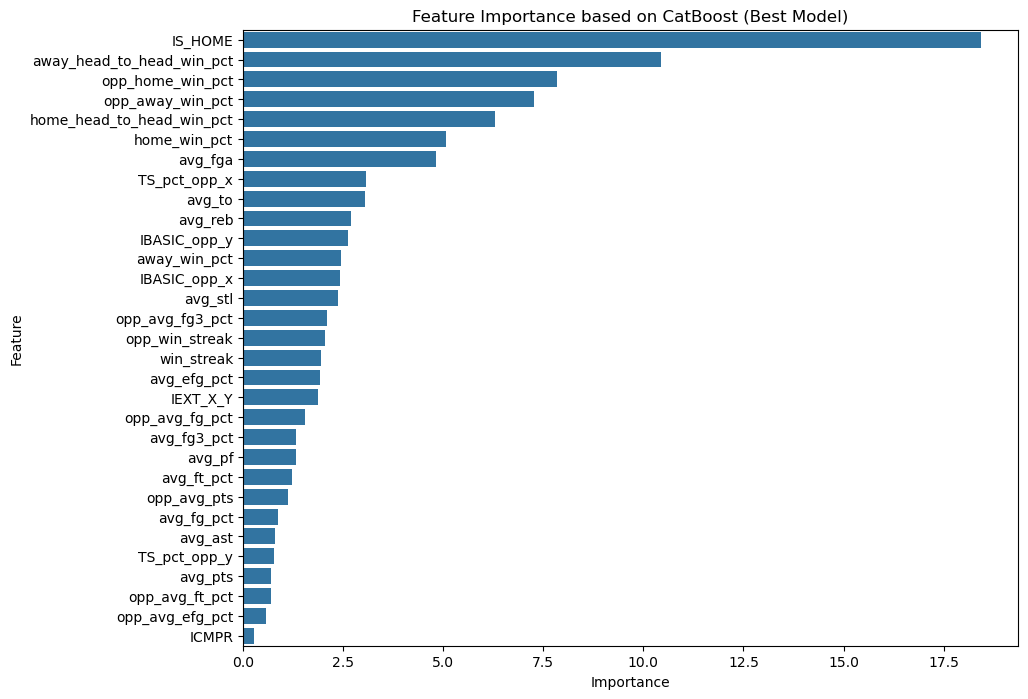

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select essential features for the model
X = NBA_team[['avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct', 'avg_ast', 'avg_reb', 'avg_stl', 'avg_to', 'avg_pf', 'avg_fga',
       'avg_efg_pct', 'win_streak', 'home_win_pct', 'away_win_pct', 
       'home_head_to_head_win_pct', 'away_head_to_head_win_pct', 'opp_avg_pts',
       'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct', 'opp_avg_efg_pct', 
       'opp_win_streak', 'opp_home_win_pct', 'opp_away_win_pct',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y']]

# Define the target variable
y = NBA_team['TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3],
}

# Initialize the CatBoost model
model = CatBoostClassifier(verbose=0, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")

# Print Classification Report, which includes precision, recall, F1-score
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate individual precision, recall, and F1-score for the positive class (1)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calculate the confusion matrix
print("Best Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_best)
print(f"AUC Score: {auc_score:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Plot feature importance of the best model
importance = best_model.get_feature_importance()
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on CatBoost (Best Model)')
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Random Forest Accuracy: 0.63
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      4744
           1       0.63      0.63      0.63      4806

    accuracy                           0.63      9550
   macro avg       0.63      0.63      0.63      9550
weighted avg       0.63      0.63      0.63      9550

Precision: 0.63
Recall: 0.63
F1-Score: 0.63
Best Random Forest Confusion Matrix:
[[2992 1752]
 [1796 3010]]
Best Hyperparameters found by GridSearchCV:
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


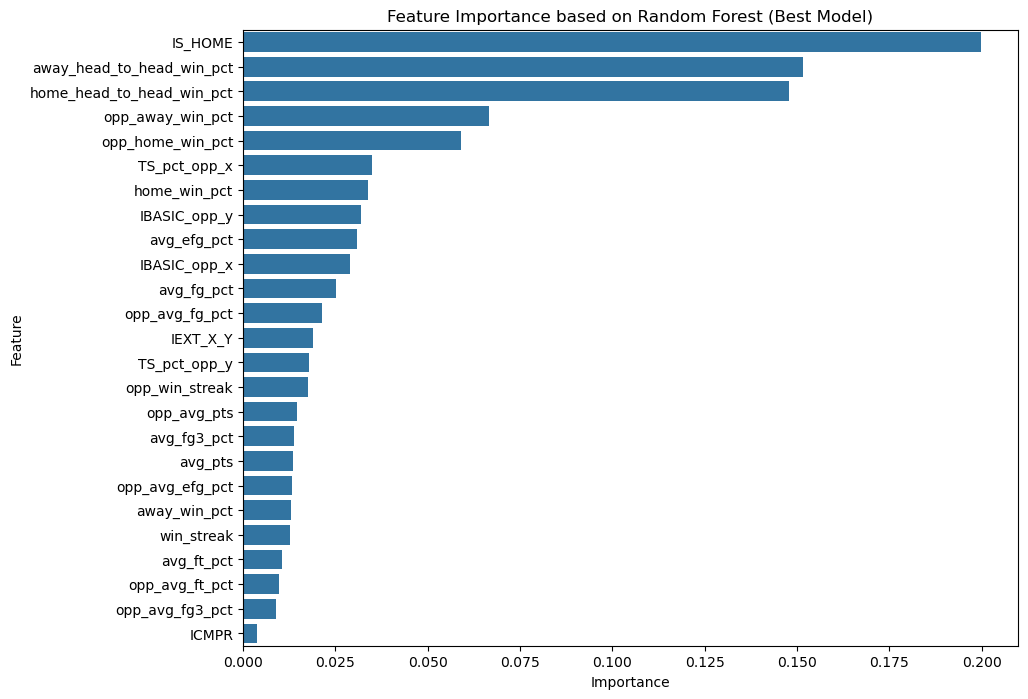

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select essential features for the model
X = NBA_team[['avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct',
       'avg_efg_pct', 'win_streak', 'home_win_pct', 'away_win_pct', 
       'home_head_to_head_win_pct', 'away_head_to_head_win_pct', 
       'opp_avg_pts', 'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct',
       'opp_avg_efg_pct', 'opp_win_streak', 'opp_home_win_pct', 'opp_away_win_pct',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y']]

# Define the target variable
y = NBA_team['TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5,7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate the best model's performance
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"Best Random Forest Accuracy: {accuracy_rf_best:.2f}")

# Print Classification Report, which includes precision, recall, F1-score
print("Best Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_best))

# Calculate individual precision, recall, and F1-score for the positive class (1)
precision = precision_score(y_test, y_pred_rf_best)
recall = recall_score(y_test, y_pred_rf_best)
f1 = f1_score(y_test, y_pred_rf_best)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calculate the confusion matrix
print("Best Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Plot feature importance of the best model
importance = best_rf_model.feature_importances_
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on Random Forest (Best Model)')
plt.show()


In [46]:
NBA_team.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'GAME_ID', 'SEASON', 'GAME_DATE_EST',
       'OPP_TEAM_ID_x', 'avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct',
       'avg_ast', 'avg_reb', 'avg_stl', 'avg_to', 'avg_pf', 'avg_fga',
       'avg_efg_pct', 'avg_fgm', 'win_streak', 'home_avg_pts', 'away_avg_pts',
       'home_win_pct', 'away_win_pct', 'home_head_to_head_avg_pts',
       'home_head_to_head_win_pct', 'OPP_TEAM_ID_y',
       'away_head_to_head_avg_pts', 'away_head_to_head_win_pct', 'opp_avg_pts',
       'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct', 'opp_avg_ast',
       'opp_avg_reb', 'opp_avg_stl', 'opp_avg_to', 'opp_avg_pf', 'opp_avg_fga',
       'opp_avg_efg_pct', 'opp_avg_fgm', 'opp_win_streak', 'opp_home_avg_pts',
       'opp_away_avg_pts', 'opp_home_win_pct', 'opp_away_win_pct', 'TEAM_WINS',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y'],
      dtype='object')

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select essential features for the model
X = NBA_team[['avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct',
       'avg_efg_pct', 'win_streak',
       'home_win_pct', 'away_win_pct', 
       'home_head_to_head_win_pct', 
       'away_head_to_head_win_pct', 'opp_avg_pts',
       'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct',
       'opp_avg_efg_pct', 'opp_win_streak', 'opp_home_win_pct', 'opp_away_win_pct',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y']]

# Define the target variable
y = NBA_team['TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],  # Solvers for optimization
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Extract the best model
best_log_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_log_best = best_log_model.predict(X_test_scaled)

# Evaluate the best model's performance
accuracy_log_best = accuracy_score(y_test, y_pred_log_best)
print(f"Best Logistic Regression Accuracy: {accuracy_log_best:.2f}")

# Print Classification Report, which includes precision, recall, F1-score
print("Best Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_best))

# Calculate individual precision, recall, and F1-score for the positive class (1)
precision = precision_score(y_test, y_pred_log_best)
recall = recall_score(y_test, y_pred_log_best)
f1 = f1_score(y_test, y_pred_log_best)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calculate the confusion matrix
print("Best Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_best))

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Analyze feature coefficients
coefficients = best_log_model.coef_[0]
features = X.columns

# Create a DataFrame to hold feature names and their coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)



Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Logistic Regression Accuracy: 0.64
Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      4744
           1       0.64      0.64      0.64      4806

    accuracy                           0.64      9550
   macro avg       0.64      0.64      0.64      9550
weighted avg       0.64      0.64      0.64      9550

Precision: 0.64
Recall: 0.64
F1-Score: 0.64
Best Logistic Regression Confusion Matrix:
[[2986 1758]
 [1725 3081]]
Best Hyperparameters found by GridSearchCV:
{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Select essential features for the model
X = NBA_team[['avg_pts', 'avg_fg_pct', 'avg_ft_pct', 'avg_fg3_pct',
       'avg_efg_pct', 'win_streak', 'home_win_pct', 'away_win_pct', 
       'home_head_to_head_win_pct', 'away_head_to_head_win_pct', 
       'opp_avg_pts', 'opp_avg_fg_pct', 'opp_avg_ft_pct', 'opp_avg_fg3_pct',
       'opp_avg_efg_pct', 'opp_win_streak', 'opp_home_win_pct', 'opp_away_win_pct',
       'IS_HOME', 'IBASIC_opp_x', 'IBASIC_opp_y', 'ICMPR', 'IEXT_X_Y',
       'TS_pct_opp_x', 'TS_pct_opp_y']]

# Define the target variable
y = NBA_team['TEAM_WINS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for ANN hyperparameter tuning
param_grid_ann = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu'],
}

# Initialize the MLPClassifier (ANN model)
ann_model = MLPClassifier(max_iter=500, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation for the ANN model
grid_search_ann = GridSearchCV(estimator=ann_model, param_grid=param_grid_ann, 
                               cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV on scaled training data
grid_search_ann.fit(X_train_scaled, y_train)

# Extract the best ANN model
best_ann_model = grid_search_ann.best_estimator_

# Make predictions using the best ANN model on the scaled test data
y_pred_ann_best = best_ann_model.predict(X_test_scaled)

# Evaluate the best ANN model's performance
accuracy_ann_best = accuracy_score(y_test, y_pred_ann_best)
print(f"Best ANN Accuracy: {accuracy_ann_best:.2f}")

# Print Classification Report, which includes precision, recall, F1-score
print("Best ANN Classification Report:")
print(classification_report(y_test, y_pred_ann_best))

# Calculate individual precision, recall, and F1-score for the positive class (1)
precision_ann = precision_score(y_test, y_pred_ann_best)
recall_ann = recall_score(y_test, y_pred_ann_best)
f1_ann = f1_score(y_test, y_pred_ann_best)

print(f"Precision: {precision_ann:.2f}")
print(f"Recall: {recall_ann:.2f}")
print(f"F1-Score: {f1_ann:.2f}")

# Calculate the confusion matrix
print("Best ANN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_best))

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters found by GridSearchCV for ANN:")
print(grid_search_ann.best_params_)

# Calculate predicted probabilities for AUC and ROC curve
y_pred_proba_ann = best_ann_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Calculate AUC score
auc_ann = roc_auc_score(y_test, y_pred_proba_ann)
print(f"AUC Score: {auc_ann:.2f}")





Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ANN Accuracy: 0.62
Best ANN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61      4744
           1       0.62      0.67      0.64      4806

    accuracy                           0.62      9550
   macro avg       0.62      0.62      0.62      9550
weighted avg       0.62      0.62      0.62      9550

Precision: 0.62
Recall: 0.67
F1-Score: 0.64
Best ANN Confusion Matrix:
[[2756 1988]
 [1607 3199]]
Best Hyperparameters found by GridSearchCV for ANN:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
AUC Score: 0.67
